In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout,Activation, BatchNormalization, regularizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
!pwd

/content/drive/My Drive/Rahul


In [0]:
import os
os.chdir("drive/My Drive/Rahul")

In [56]:
classifier = Sequential()

classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3),activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(64,3,3, input_shape = (64,64,3),activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  import sys


In [57]:
classifier.add(Flatten())
classifier.add(Dense(output_dim =256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim = 3, activation = 'softmax'))
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  after removing the cwd from sys.path.


In [58]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
dropout_14 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [62]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64,64),
    batch_size=20,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64,64),
    batch_size=20,
    class_mode='categorical')

Found 300 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [63]:
from IPython.display import display
from PIL import Image
history = classifier.fit_generator(
    training_set,
    steps_per_epoch = 15,
    epochs = 25,
    validation_data = test_set,
    validation_steps = 3)

Epoch 1/25
15/15 [==============================] - 2s 125ms/step - loss: 1.0122 - acc: 0.4933 - val_loss: 0.8258 - val_acc: 0.6667
Epoch 2/25
15/15 [==============================] - 1s 94ms/step - loss: 0.7233 - acc: 0.7167 - val_loss: 0.6099 - val_acc: 0.8333
Epoch 3/25
15/15 [==============================] - 2s 104ms/step - loss: 0.4530 - acc: 0.8400 - val_loss: 0.3415 - val_acc: 0.8833
Epoch 4/25
15/15 [==============================] - 2s 104ms/step - loss: 0.3506 - acc: 0.8700 - val_loss: 0.3015 - val_acc: 0.9500
Epoch 5/25
15/15 [==============================] - 2s 104ms/step - loss: 0.2224 - acc: 0.9267 - val_loss: 0.2474 - val_acc: 0.9167
Epoch 6/25
15/15 [==============================] - 2s 101ms/step - loss: 0.1958 - acc: 0.9400 - val_loss: 0.1690 - val_acc: 0.9500
Epoch 7/25
15/15 [==============================] - 2s 102ms/step - loss: 0.2049 - acc: 0.9200 - val_loss: 0.3989 - val_acc: 0.8667
Epoch 8/25
15/15 [==============================] - 2s 102ms/step - loss: 0.1

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Text(0.5, 1.0, 'Training and validation loss')

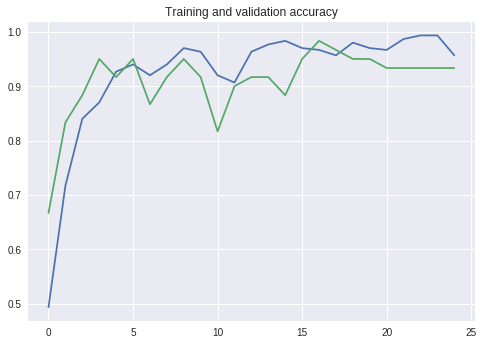

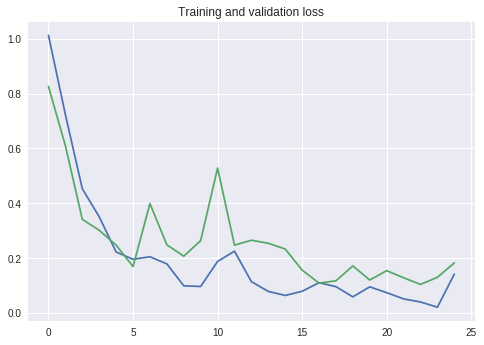

In [65]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [68]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('blight_grape_1.jpg',target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result [0][0] == 1:
    prediction = 'Grape___Esca_(Black_Measles)'
elif result [0][1] == 1:
    prediction = 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
else:
    prediction = 'Grape___healthy'
print(prediction)

Grape___healthy


In [27]:
!ls

blight_grape_1.jpg   dataset		  measles_grape_1.jpg
cnncode_grape.ipynb  healthy_grape_1.jpg


weights of the above model saved

In [0]:
fname = "grape_CNN.hdf5"
classifier.save_weights(fname,overwrite=True)

This is to load the weights trained above

In [0]:
fname = "grape_CNN.hdf5"
classifier.load_weights(fname)

ValueError: ignored